<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Performing_K-Nearest-Neighbors_and_Naive_Bayes_Classification_using_Scikit-learn/blob/master/Week9_IP_Precy_Mae_(Dataset_1_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Titanic Dataset using K Nearest Neighbor


---




# **1. Defining the Question**


---
## a) Specifying the Question
Creating a K nearest neighbors model that predicts survival rate for the titanic passenger and improving the model. 

## b) Defining the Metric for Success
Improving the K nearest neighbors model to its best.

## c) Understanding the context
We are interested in predicting the survival rate of passengers in the titanic using the K nearest neighbors.

## d) Recording the Experimental Design
### 1) Business Understanding: 
The goal is to be able to predict whether a passenger will survive or not in order to inform the marine transportation sector.

### 2) Reading the data to a pandas dataframe

###3) Checking our data: 

Understanding the components of our dataset. The shape, data types, top and tail of our dataset.

### 4) Data cleaning: 
Changing column names, removing unneeded columns, removing outliers, changing data types , removing missing values .

### 5) EDA: 
Visualizing and understanding data using univariate and bivariate analysis.

### 6) Implementing the solution:

 Performing the K nearest neighbors model and improving it. 

###7) Conclusion:

Which is the best method to improve the model

### 8)Challenging the solution: 

How can the solution be improved, does it have hitches.


# **2. Data cleaning and preparation**

## Loading libraries and dataset

In [366]:
# Importing our Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [367]:
# Reading our datasets
train= pd.read_csv('/content/train (5).csv')
test= pd.read_csv('/content/test (1) (1).csv')
test.head(3)

PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.0000    NaN         S
2          894       2         Myles, Mr. Thomas Francis  ...  9.6875    NaN         Q

[3 rows x 11 columns]

In [368]:
# Previewing the top of our dataset 
train.head(3)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]

## Checking our datasets

In [369]:
# Shape of dataset
print("train rows and columns",train.shape)
print("test rows and columns",test.shape)

train rows and columns (891, 12)
test rows and columns (418, 11)


In [370]:
# Checking our column datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [371]:
# Changing the column datatypes (object) of the data we'll be using into category
train['Name'] = train.Name.astype('category')
train['Sex'] = train.Sex.astype('category')
train['Ticket'] = train.Ticket.astype('category')
train['Cabin'] = train.Cabin.astype('category')
train['Survived'] = train.Survived.astype('category')
train['Embarked'] = train.Embarked.astype('category')
train.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

Our categorical features are now in category form

## Dealing with missing data


In [372]:
# Checking for missing data
print("Missing values in train")
print("")
print(train.isnull().sum())
# 
print("")
print("Missing values in test")
print("")
print(test.isnull().sum())

Missing values in train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are missing values in Fare, Cabin, age and embarked

In [373]:
# Filling missing values in train dataset
#
# Filling missing values in age with the mean
train['Age']=train['Age'].fillna(train['Age'].mean())
#
# Filling missing values in cabin with the 
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode().iloc[0])
#
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode().iloc[0])


In [374]:
# Filling missing values in test dataset

# Filling missing values in age with the mean
test['Age']=test['Age'].fillna(test['Age'].mean())
#
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
#
# Filling missing values in cabin with the mode
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode().iloc[0])

In [375]:
# Confirming that our null valeus are replaced 
print("Missing values in train")
print("")
print(train.isnull().sum())
# 
print("")
print("Missing values in test")
print("")
print(test.isnull().sum())

Missing values in train

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Missing values in test

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


We have dealt with missing values in our datasets

In [376]:
# Data cleaning procedures, fixing column names
#
train.columns= train.columns.str.strip().str.lower().str.replace(' ','_')
train.head(2)

passengerid survived  pclass  ...     fare    cabin  embarked
0            1        0       3  ...   7.2500  B96 B98         S
1            2        1       1  ...  71.2833      C85         C

[2 rows x 12 columns]

Our columns names are now in lowercase[link text](https://)

In [377]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

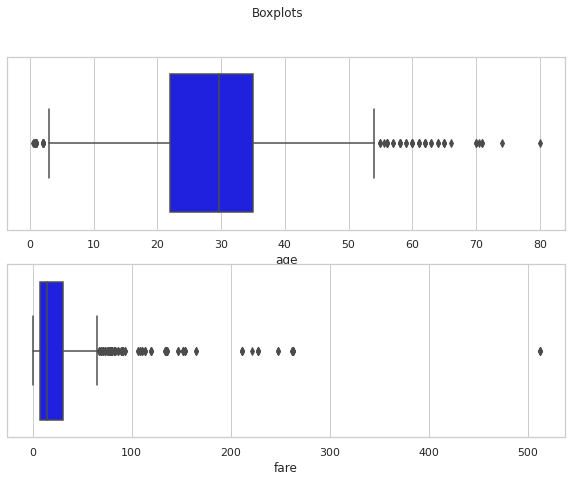

In [378]:
# Checking for outliers
fig, ((ax1),(ax2)) = plt.subplots(2 ,figsize=(10, 7))
fig.suptitle('Boxplots')
print('\n')
sns.boxplot(train['age'], ax=ax1, color='blue')
sns.boxplot(train['fare'], ax=ax2, color='blue')


plt.show()

The outlier in age is quite reasonable so we will not remove it but we will remove the outliers beyond fare 150

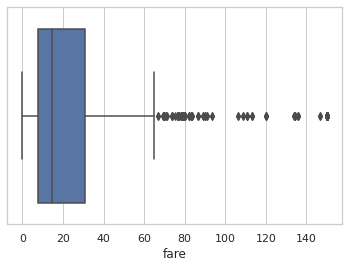

In [379]:
# Removing outliers
train["fare"] = np.where(train["fare"] >150.0, 150.0,train['fare'])
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["fare"])

As shown above the outliers have been removed

# **3. Perform EDA**

## Univariate analysis

In [380]:
# Univariate analysis using pandas profiling
!pip install pandas-profiling -U

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [381]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof.to_file(output_file='output.html')

In [382]:
# Viewing our report
prof

### Report Summary


---
* Most of our categorical variables are unbalanced ( pclass, survived,sex,parch, cabin, embarked and sibsp).
* Age seems to be normally distributed.
* Tickets and names are all unique for all individuals.
* There seems to be a negatively moderate correlation between pclass and fare.
* Missing values were cleared during cleaning.


## Bivariate analysis

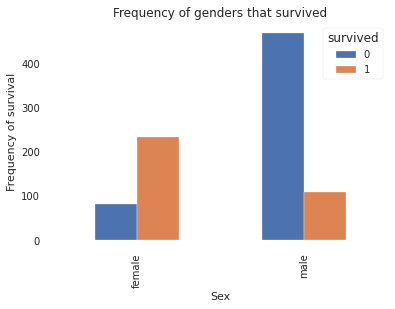

In [392]:
# Plotting the frequency of survival amoung genders
%matplotlib inline
pd.crosstab(train.sex,train.survived).plot(kind='bar')
plt.title('Frequency of genders that survived')
plt.xlabel('Sex')
plt.ylabel('Frequency of survival')
plt.savefig('frequency of survival amoung genders')

It seems that the female sex were more likely to survive than the male. This could be because the male took part more in the rescuing process.

In [387]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

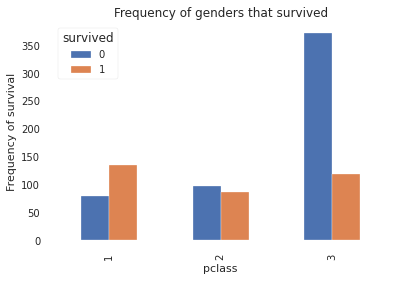

In [390]:
# plotting frequency of survival amoung class
pd.crosstab(train.pclass,train.survived).plot(kind='bar')
plt.title('Frequency of genders that survived')
plt.xlabel('pclass')
plt.ylabel('Frequency of survival')
plt.savefig('frequency of survival amoung p class')

Text(0.5, 1.0, 'Showing density of ages amoung the sexes present')

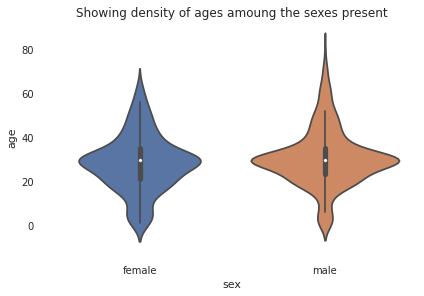

In [396]:
# Violin plots to show density of waterfront against house age
sns.catplot(x='sex', y='age', 
            data=train,
            height=4,aspect=1.5,
            kind='violin')
plt.title('Showing density of ages amoung the sexes present')

* There were less older passengers who were female than the male.
* There were more under ten passengers who were female than male.
* Most passengers were aged around 30 years.

# **4. Splitting dataset** 

## Splitting dataset

In [ ]:
# Dropping irrelevant columns
train.drop(['name', 'passengerid','ticket'], axis = 1, inplace= True) 

In [ ]:
# Scaling our numerical features to a standard normal distribution
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['age','fare']

train[columns_to_scale]= StandardScaler.fit_transform(train[columns_to_scale])
train.head(2)

survived  pclass     sex       age  sibsp  parch      fare    cabin embarked
0        0       3    male -0.592481      1      0 -0.645209  B96 B98        S
1        1       1  female  0.638789      1      0  1.232768      C85        C

## Encoding

In [ ]:
# Applying label encoding to our categorical features to ensure they are in binary form
cat_columns=['sex','cabin','embarked']
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for column in cat_columns:
  lbl_encoders[column]=LabelEncoder()
  train[column]= lbl_encoders[column].fit_transform(train[column])

In [ ]:
# Get dummies for our dependent variable
train['survived'].replace([1, 0],[1,0],inplace=True)

In [ ]:
# Splitting our dataset
X=train.loc[:, train.columns != 'survived'] # Independent variables

y= train.iloc[:, train.columns == 'survived'] # Dependent variable
y.head()

survived
0         0
1         1
2         1
3         1
4         0

In [ ]:
# viewing our x
X

pclass  sex       age  sibsp  parch      fare  cabin  embarked
0         3    1 -0.592481      1      0 -0.645209     47         2
1         1    0  0.638789      1      0  1.232768     81         0
2         3    0 -0.284663      0      0 -0.625413     47         2
3         1    0  0.407926      1      0  0.699486     55         2
4         3    1  0.407926      0      0 -0.621747     47         2
..      ...  ...       ...    ...    ...       ...    ...       ...
886       2    1 -0.207709      0      0 -0.476573     47         2
887       1    0 -0.823344      0      0  0.022006     30         2
888       3    0  0.000000      1      2 -0.170094     47         2
889       1    1 -0.284663      0      0  0.022006     60         0
890       3    1  0.177063      0      0 -0.630545     47         1

[891 rows x 8 columns]

# **5. Modelling**

## Base model


---
**K nearest neighbors**
*  It does not make any assumptions on the underlying data distribution. 

In [ ]:
# Train test split our x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing and running our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fitting our model
knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predictions
predict = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.770949720670391


Our accuracy score is 74% let's see if we can improve it

In [ ]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict))

[[88 22]
 [24 45]]


## Improving perfomance

#### LDA

In [ ]:
# Improving our model using  LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Importing and running our model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fitting our model
KNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predictions
p = KNN.predict(X_test)

In [ ]:
# Checking the accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, p))

Accuracy: 0.7877094972067039


Our model has slightly improved by 0.0065 % after including LDA



In [ ]:
# Using gridsearch cv to tune hyperparamaeters of our model
from sklearn.model_selection import GridSearchCV
#List Hyperparameters to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/s

In [ ]:
# Best Hyperparameters Values
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 16


The best leaf size is 1, best p is 1 and best number of neighbors to use is 16 which will be used in the better model.

In [ ]:
#Predict testing set
p2 = best_model.predict(X_test)

In [ ]:
# Checking the accuracy of the improved model
print("Accuracy:",metrics.accuracy_score(y_test, p2))

Accuracy: 0.7988826815642458


Tunning my hyperparameters has boosted my model to a 79 which is an excellent improvement.

# **6. Testing the model**

#### Cleaning our test dataset

In [ ]:
# Viewing our test dataset
test.head(3)

PassengerId  Pclass  ...            Cabin Embarked
0          892       3  ...  B57 B59 B63 B66        Q
1          893       3  ...  B57 B59 B63 B66        S
2          894       2  ...  B57 B59 B63 B66        Q

[3 rows x 11 columns]

In [ ]:
# Changing the column datatypes (object) of the data we'll be using into category
test['Name'] = test.Name.astype('category')
test['Sex'] = test.Sex.astype('category')
test['Ticket'] = test.Ticket.astype('category')
test['Cabin'] = test.Cabin.astype('category')
test['Embarked'] = test.Embarked.astype('category')
test.dtypes

PassengerId       int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

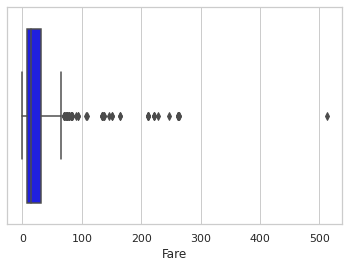

In [ ]:
# Removing outliers just like our train dataset from 150
sns.boxplot(test['Fare'], color='blue')

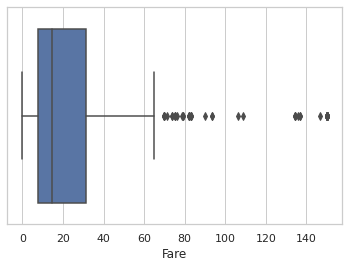

In [ ]:
# Removing outliers
test["Fare"] = np.where(test["Fare"] >150.0, 150.0,test['Fare'])
sns.set(style="whitegrid")
ax = sns.boxplot(x=test["Fare"])

In [ ]:
# Scaling our numerical features to a standard normal distribution
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['Age','Fare']

test[columns_to_scale]= StandardScaler.fit_transform(test[columns_to_scale])
test.head(2)

PassengerId  Pclass  ...            Cabin Embarked
0          892       3  ...  B57 B59 B63 B66        Q
1          893       3  ...  B57 B59 B63 B66        S

[2 rows x 11 columns]

In [ ]:
# Checking for the shape of the test dataset
test.shape

(418, 11)

In [ ]:
# Dropping irrelevant columns
test.drop(['Name', 'PassengerId','Ticket'], axis = 1, inplace= True) 

In [ ]:
# Applying label encoding to our categorical features to ensure they are in binary form
cat_columns=['Sex','Cabin','Embarked']
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for column in cat_columns:
  lbl_encoders[column]=LabelEncoder()
  test[column]= lbl_encoders[column].fit_transform(test[column])

In [ ]:
# printing our dimensions
print(clf.predict(test))

ValueError: ignored

# **7. Conclusion** 


---

The model with the best parameters produced the most accurate model therefore will be the best to predict our model.

# **8. Challenging the Solution**


---
The model will probably perform better if we use LDA together with the hyperparameter K neighbors which is 16  p of 1 and leaf size of 1


In [ ]:
# Using  LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Importing and running our model using hyperparameters
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=16, leaf_size=1 ,p= 1)

In [ ]:
# Fitting our model
knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Predictions
pre = knn.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, pre))

Accuracy: 0.7877094972067039


LDA with our hyperparameters has not improved our model

# Challenging the solution 


---
feature selection


In [345]:
# Selecting the most important features
X= train.loc[:, train.columns != 'survived'] # Independent variables

y= train.iloc[:, train.columns == 'survived'] # Dependent variable
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [346]:
# Showing the feature importance rates
print(model.feature_importances_)

[0.1070457  0.30602149 0.22142848 0.04741321 0.0318183  0.18677829
 0.06356347 0.03593106]


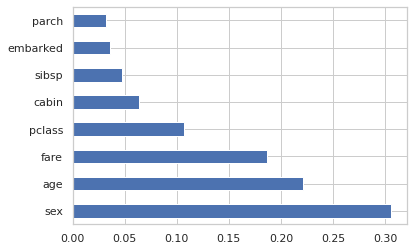

In [348]:
# To plot graph of the top ten features that influence hypotyroidsm
feat_importances= pd.Series(model.feature_importances_, index= X.columns)
# You can take the top five important features
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Sex seems to be a high factor determining survival rate, this could imply that one sex probably had features that helped them have an upper hand at surviving than the other.

In [357]:
# Selecting the features above
cols=['fare','age','sex','survived']
df=train[cols]

In [358]:
# Separating dependent and independent variables
X= df.loc[:, df.columns != 'survived'] # Independent variables

y= df.iloc[:, df.columns == 'survived'] # Dependent variable

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [360]:
# Using  LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [361]:
# Importing and running our model using hyperparameters
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=16, leaf_size=1 ,p= 1)

In [362]:
# Fitting our model
Knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=1,
                     weights='uniform')

In [363]:
# Predictions
predictions = Knn.predict(X_test)

In [364]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7821229050279329


This has also not improved our model.